<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker with additions by Theo Olsthoorn*

## Notebook 5: Time series data and Pandas

In [1]:
# We will probably need these
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Loading real data with Pandas
Real data is often stored in CSV files (Comma Separated Values).
So far, we have loaded csv files with the `np.loadtxt` command. 
The `loadtxt` function has some basic functionality and works just fine, but when we have more elaborate data sets we want more sophisticated functionality. 
The most powerful and advanced package for data handling and analysis is called `pandas`. We will use only a few functions of the `pandas` package here. Full information on `pandas` can be found on the [pandas website](http://pandas.pydata.org/).

### Exercise 1. <a name="back1"></a>Average annual rainfall by country
The file `annual_precip.csv` contains the average yearly rainfall and total land area for all the countries in the world (well, there are some missing values);  the data is available on the website of the <a href="http://data.worldbank.org/">world bank</a>. Open the data file to see what it looks like (Notepad, Textedit, even Word if you have to). Load the data with the `read_csv` function of `pandas`, making sure that the names of the countries can be used to select a row, and perform the following tasks:

* Print the first 5 lines of the DataFrame to the screen with the `.head()` function.
* Print the average annual rainfall for Panama and make sure to include the units.
* Report the total land area of the Netherlands and make sure to include the units.
* Report all countries with an average annual rainfall less than 200 mm/year
* Report all countries with an average annual rainfall more than 2500 mm/year
* Report all countries with an average annual rainfall that is within 50 mm/year of the average annual rainfall in the Netherlands

In [2]:
rain = pd.read_csv('annual_precip.csv', skiprows=2, index_col=0)

# Examine the read file
print('First five lines of rain dataset:')
print(rain.head(10))

First five lines of rain dataset:
                     precip    area
country                            
Afghanistan           327.0   652.2
Albania              1485.0    27.4
Algeria                89.0  2381.7
American Samoa          NaN     0.2
Andorra                 NaN     0.5
Angola               1010.0  1246.7
Antigua and Barbuda  1030.0     0.4
Argentina             591.0  2736.7
Armenia               562.0    28.5
Aruba                   NaN     0.2


Get data for specific countries:

In [3]:
print('\nAverage annual rainfall in Panama is',rain.loc['Panama','precip'],'mm/year')


Average annual rainfall in Panama is 2692.0 mm/year


In [4]:
print('\nLand area of the Netherlands is', rain.loc['Netherlands','area'], 'thousand km^2/year')


Land area of the Netherlands is 33.7 thousand km^2/year


In [5]:
print('\nCountries where average rainfall is below 200 mm/year')
print(rain[ rain.precip < 200 ])


Countries where average rainfall is below 200 mm/year
                      precip    area
country                             
Algeria                 89.0  2381.7
Bahrain                 83.0     0.8
Egypt, Arab Rep.        51.0   995.5
Jordan                 111.0    88.8
Kuwait                 121.0    17.8
Libya                   56.0  1759.5
Mauritania              92.0  1030.7
Niger                  151.0  1266.7
Oman                   125.0   309.5
Qatar                   74.0    11.6
Saudi Arabia            59.0  2149.7
Turkmenistan           161.0   469.9
United Arab Emirates    78.0    83.6
Yemen, Rep.            167.0   528.0


In [6]:
print('\nCountries where average rainfall is above 2500 mm/year')
print(rain[ rain.precip > 2500 ])


Countries where average rainfall is above 2500 mm/year
                       precip    area
country                              
Bangladesh             2666.0   130.2
Brunei Darussalam      2722.0     5.3
Colombia               2612.0  1109.5
Costa Rica             2926.0    51.1
Fiji                   2592.0    18.3
Indonesia              2702.0  1811.6
Malaysia               2875.0   328.6
Panama                 2692.0    74.3
Papua New Guinea       3142.0   452.9
Sao Tome and Principe  3200.0     1.0
Sierra Leone           2526.0    71.6
Solomon Islands        3028.0    28.0


In [7]:
print('Countries with almost the same rainfall as Netherlands')

print(rain[    abs(rain.loc['Netherlands','precip'] - rain.precip) < 50     ])

Countries with almost the same rainfall as Netherlands
                 precip    area
country                        
Burkina Faso      748.0   273.6
Lesotho           788.0    30.4
Mexico            752.0  1944.0
Netherlands       778.0    33.7
Slovak Republic   824.0    48.1
Swaziland         788.0    17.2


### Time series data

In time series data, one of the columns represents dates, sometimes including times, together referred to as datetimes. `pandas` can be used to read csv files where one of the columns includes datetime data. You need to tell `pandas` which column contains datetime values and `pandas` will try to convert that column to datetime objects. Datetime objects are very convenient as specifics of the datetime object may be assessed with the dot syntax: `.year` returns the year, `.month` returns the month, etc.

For example, consider the following data stored in the file `timeseries1.dat`

`date, conc`  
`2014-04-01, 0.19`   
`2014-04-02, 0.23`   
`2014-04-03, 0.32`   
`2014-04-04, 0.29`   

The file may be read with `read_csv` using the keyword `parse_dates=[0]` so that column number 0 is converted to datetimes

In [8]:
data = pd.read_csv('timeseries1.dat', parse_dates=[0])
print(data)

        date   conc
0 2014-04-01   0.19
1 2014-04-02   0.23
2 2014-04-03   0.32
3 2014-04-04   0.29
4 2014-04-05   0.32


The rows of the DataFrame `data` are numbered, as we have not told `pandas` what column to use as the index of the rows. The first column of the DataFrame `data` has datetime values. We can access, for example, the year, month, or day with the dot syntax

In [9]:
print('datetime of row 0:', data.iloc[0,0])
print('year  of row 0:', data.iloc[0,0].year)
print('month of row 0:', data.iloc[0,0].month)
print('day   of row 0:', data.iloc[0,0].day)

datetime of row 0: 2014-04-01 00:00:00
year  of row 0: 2014
month of row 0: 4
day   of row 0: 1


Time series data may also contain the time in addition to the date. For example, the data of the file `timeseries2.dat`, shown below, contains the day and time. You can access the `hour` or `minutes`, but also the time of a row of the DataFrame with the `.time()` function.

`date, conc`   
`2014-04-01 12:00:00, 0.19`   
`2014-04-01 13:00:00, 0.20`  
`2014-04-01 14:00:00, 0.23`  
`2014-04-01 15:00:00, 0.21` 

In [10]:
data = pd.read_csv('timeseries2.dat', parse_dates=[0])
print(data)
print('hour  of row 0:', data.iloc[0,0].hour)
print('minute  of row 0:', data.iloc[0,0].minute)
print('time of row 0:', data.iloc[0,0].time())

                 date   conc
0 2014-04-01 12:00:00   0.19
1 2014-04-01 13:00:00   0.20
2 2014-04-01 14:00:00   0.23
3 2014-04-01 15:00:00   0.21
hour  of row 0: 12
minute  of row 0: 0
time of row 0: 12:00:00


Here we do the same thing, but additionally tell read_csv to use column  0 as index_col

                      conc
date                      
2014-04-01 12:00:00   0.19
2014-04-01 13:00:00   0.20
2014-04-01 14:00:00   0.23
2014-04-01 15:00:00   0.21


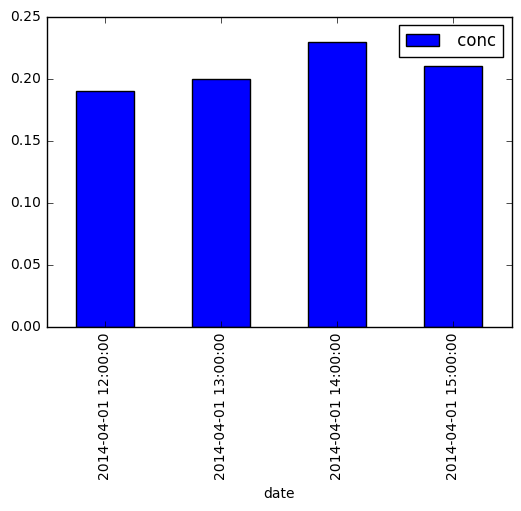

In [11]:
data = pd.read_csv('timeseries2.dat', parse_dates=[0], index_col=0)
print(data)

data.plot(kind='bar')
plt.show()

### Exercise 3,  <a name="back3"></a>Load and plot daily rainfall
Rainfall data for the Netherlands may be obtained from the website of the Royal Dutch Meteorological Society <A href="http://www.knmi.nl/climatology/daily_data/selection.cgi">KNMI</A> . Daily rainfall for the weather station Rotterdam in 2012 is stored in the file `rotterdam_rainfall_2012.txt`. First open the file in a text editor to see what the file looks like. At the top of the file, an explanation is given of the data in the file. Read this. Load the data file with the `read_csv` function of `pandas`. Use the keyword `skiprows` to skip all rows except for the row with the names of the columns. Use the keyword `parse_dates` to give either the name or number of the column that needs to be converted to a datetime. Don't forget the `skipinitialspace` keyword, else the names of the columns may start with a bunch of spaces. Perform the following tasks:
* Some rainfall values in the dataset may be -1 (read the header of the file to learn why); set all rainfall values that are less than zero to zero. 
* Use the `plot` function of `pandas` to create a line plot of the daily rainfall with the number of the day (so not the date) along the horizontal axis. 
* Use `matplotlib` functions to add labels to the axes and set the limits along the horizontal axis from 0 to 365. 
* Determine the maximum daily rainfall and the date of the maximum daily rainfall and print them to the screen.

In [12]:
rain = pd.read_csv('rotterdam_rainfall_2012.txt',skiprows=9,
                parse_dates=['YYYYMMDD'],skipinitialspace=True, index_col='YYYYMMDD')
rain.head(10)

,STN,RH
YYYYMMDD,,
2012-01-01,344,207
2012-01-02,344,-1
2012-01-03,344,144
2012-01-04,344,36
2012-01-05,344,84
2012-01-06,344,8
2012-01-07,344,30
2012-01-08,344,-1
2012-01-09,344,8


These data need some manipulation. The rain values are given in 0.1 mm/d where -1 means 0.0005 mm/d.

To convert the RH to mm/d, remove the station number and change the name of the index

We can drop the column 'STN' and the result is a DataFrame

In [13]:
rain.drop('STN', axis=1)

,RH
YYYYMMDD,
2012-01-01,207
2012-01-02,-1
2012-01-03,144
2012-01-04,36
2012-01-05,84
2012-01-06,8
2012-01-07,30
2012-01-08,-1
2012-01-09,8


We could also just select column 'RH' and then we obtain a time series.

In [14]:
rain = rain['RH']

In [15]:
rain

YYYYMMDD
2012-01-01    207
2012-01-02     -1
2012-01-03    144
2012-01-04     36
2012-01-05     84
2012-01-06      8
2012-01-07     30
2012-01-08     -1
2012-01-09      8
2012-01-10      0
2012-01-11     10
2012-01-12      9
2012-01-13      4
2012-01-14     -1
2012-01-15      0
2012-01-16      0
2012-01-17      0
2012-01-18     32
2012-01-19    144
2012-01-20     -1
2012-01-21     35
2012-01-22     19
2012-01-23     16
2012-01-24      5
2012-01-25      5
2012-01-26     33
2012-01-27     -1
2012-01-28     -1
2012-01-29      0
2012-01-30      1
             ... 
2012-12-02     93
2012-12-03     52
2012-12-04     96
2012-12-05     29
2012-12-06      7
2012-12-07    107
2012-12-08      1
2012-12-09    102
2012-12-10     16
2012-12-11      2
2012-12-12     -1
2012-12-13     -1
2012-12-14    103
2012-12-15      8
2012-12-16     24
2012-12-17     31
2012-12-18     16
2012-12-19      0
2012-12-20     68
2012-12-21      9
2012-12-22    224
2012-12-23     76
2012-12-24     32
2012-12-25    125
2

rain[rain < 0] = 0.5
rain

This implies automatic conversion from int to float dtype.

Then divide by 10 to obtain mm/d.

In [16]:
rain = rain/10.
rain

YYYYMMDD
2012-01-01    20.7
2012-01-02    -0.1
2012-01-03    14.4
2012-01-04     3.6
2012-01-05     8.4
2012-01-06     0.8
2012-01-07     3.0
2012-01-08    -0.1
2012-01-09     0.8
2012-01-10     0.0
2012-01-11     1.0
2012-01-12     0.9
2012-01-13     0.4
2012-01-14    -0.1
2012-01-15     0.0
2012-01-16     0.0
2012-01-17     0.0
2012-01-18     3.2
2012-01-19    14.4
2012-01-20    -0.1
2012-01-21     3.5
2012-01-22     1.9
2012-01-23     1.6
2012-01-24     0.5
2012-01-25     0.5
2012-01-26     3.3
2012-01-27    -0.1
2012-01-28    -0.1
2012-01-29     0.0
2012-01-30     0.1
              ... 
2012-12-02     9.3
2012-12-03     5.2
2012-12-04     9.6
2012-12-05     2.9
2012-12-06     0.7
2012-12-07    10.7
2012-12-08     0.1
2012-12-09    10.2
2012-12-10     1.6
2012-12-11     0.2
2012-12-12    -0.1
2012-12-13    -0.1
2012-12-14    10.3
2012-12-15     0.8
2012-12-16     2.4
2012-12-17     3.1
2012-12-18     1.6
2012-12-19     0.0
2012-12-20     6.8
2012-12-21     0.9
2012-12-22    22.4
201

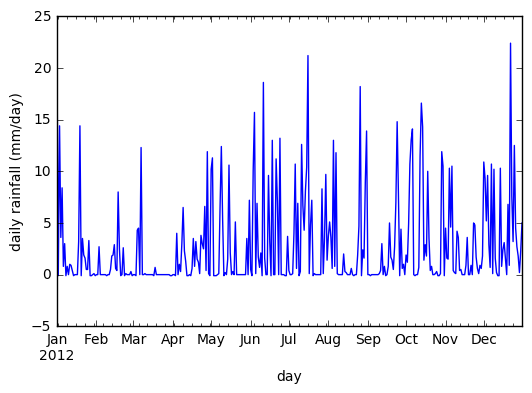

Maximum daily rainfall 22.4
Date of maximum daily rainfall 2012-12-22 00:00:00


In [20]:
rain.plot()
plt.xlabel('day')
plt.ylabel('daily rainfall (mm/day)')
plt.show()

print('Maximum daily rainfall',rain.max())
print('Date of maximum daily rainfall',rain.argmax())


### Exercise 4,  <a name="back4"></a>Compute monthly rainfall from daily rainfall
In this exercise we are going to compute the total monthly rainfall for 2012 in the City of Rotterdam using the daily rainfall measurements we loaded in the previous Exercise; later on in this Notebook we learn convenient functions from `pandas` to do this, but here we are going to do this with a loop. Create an array of 12 zeros to store the monthly totals and loop through all the days in 2012 to compute the total rainfall for each month. The month associated with each row of the DataFrame may be obtained with the `.month` syntax, as shown above. Print the monthly totals (in mm/month) to the screen and create a bar graph of the total monthly rainfall (in mm/month) vs. the month using the `plt.bar` function of matplotlib. 

In [22]:
rain.resample('M').sum()

YYYYMMDD
2012-01-31     82.3
2012-02-29     23.9
2012-03-31     21.5
2012-04-30     57.1
2012-05-31     76.1
2012-06-30    118.5
2012-07-31    121.4
2012-08-31     93.2
2012-09-30     51.7
2012-10-31    132.2
2012-11-30     63.3
2012-12-31    149.3
Freq: M, Name: RH, dtype: float64

### Date times as index
The datetime of a dataset may also be used as the index of the DataFrame by specifying the column with the dates as the column to use for an index with the `index_col` keyword.  Note that datetimes are given as year-month-day, so `2012-04-01` means April 1, 2012.

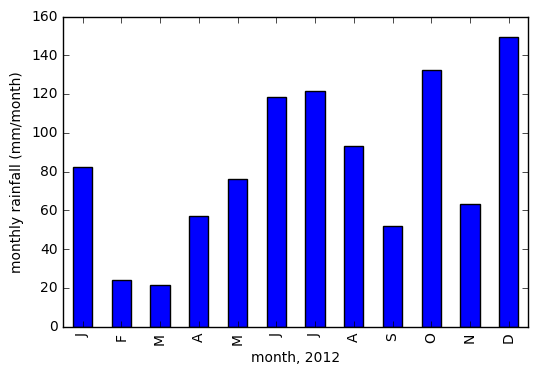

In [35]:
monthlyRain = rain.resample('M').sum()
monthlyRain.plot(kind='bar')
plt.xticks(np.arange(12),['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlabel('month, 2012')
plt.ylabel('monthly rainfall (mm/month)')
plt.show()

In [102]:
data = read_csv('timeseries1.dat', parse_dates=[0], index_col=0)
print(data)
print('data on April 1:',data.loc['2014-04-01'])
print('data on April 2:',data.loc['2014-04-02'])

             conc
date             
2014-04-01   0.19
2014-04-02   0.23
2014-04-03   0.32
2014-04-04   0.29
2014-04-05   0.32
data on April 1:  conc    0.19
Name: 2014-04-01 00:00:00, dtype: float64
data on April 2:  conc    0.23
Name: 2014-04-02 00:00:00, dtype: float64


### Resampling
DataFrames have a very powerful feature called resampling. Downsampling refers to going from high frequency to low frequency. For example, going from daily data to monthly data. Upsampling refers to going from low frequency to high frequency. For example going from monthly data to daily data. For both upsampling and downsampling, you need to tell `pandas` how to perform the resampling. Here we discuss downsampling, where we computed monthly totals from daily values. First we load the daily rainfall in Rotterdam in 2012 from the file `rotterdam_rainfall_2012.txt` and specify the dates as the index (this is the column labeled as `YYYYMMDD`). We resample the rain to monthly totals using the `resample` function. You have to tell the `resample` function to what frequency it needs to resample. Common ones are `'A'` for yearly, `'M'` for monthly, `'W'` for weekly, `'D'` for daily, and `'H'` for hourly, but there are many other ones (see  [here](http://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html).  The keyword argument `how` is used to tell `pandas` how to compute the resampled data. This can be many things, like `'mean'` for the mean (that is the default), `'sum'` for the total, `'min'`, `'max'`, etc. The keyword argument `kind` is used to tell `pandas` where to assign the computed value to. You can assign the computed value to the last day of the period, or the first day, or to the entire period (in this case the entire month). The latter is done by specifying `kind='period'`, which is what we will do here. Calculating the montly totals and making a bar graph can now be done with `pandas` as follows. 

YYYYMMDD
2012-01     83.35
2012-02     24.50
2012-03     22.10
2012-04     57.85
2012-05     76.70
2012-06    119.25
2012-07    121.70
2012-08     93.50
2012-09     52.15
2012-10    132.80
2012-11     63.30
2012-12    149.60
Freq: M, Name: RH, dtype: float64


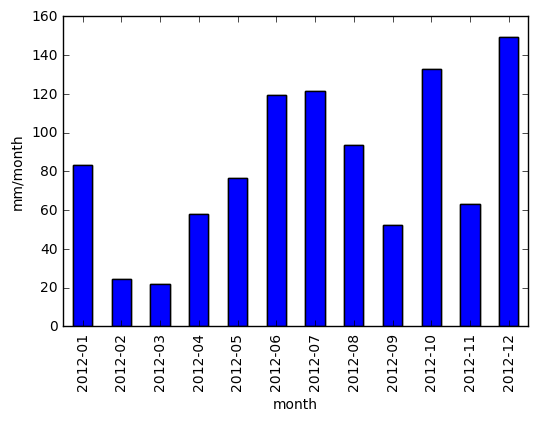

In [38]:
rain = pd.read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD',
                skipinitialspace=True)
rain.RH[rain.RH<0] = 0.5
rain.RH = rain.RH * 0.1 # Convert to mm/day
monthlyrain = rain.RH.resample('M', kind='period').sum()
print(monthlyrain)
monthlyrain.plot(kind='bar')
plt.ylabel('mm/month')
plt.xlabel('month')
plt.show()

### Exercise 5,<a name="back5"></a> Resample weather data
The file `rotterdam_weather_2000_2010.txt` contains daily weather data at the weather station Rotterdam for the period 2000-2010 (again from the KNMI). Open the data file in an editor to see what is in it. Perform the following tasks:
* Load the data making sure the dates are used as index. 
* Convert the rain and evaporation to mm/day, and the temperature to degrees Celcius. 
* Set any negative rainfall (explained in the file) to zero. 
* Compute total yearly rainfall, total yearly evaporation, and mean yearly temperature. 
* Make a line plot of the yearly rainfall, yearly evaporation, and mean temperature using the `plot` function of `pandas`. Make sure to plot the mean temperature on the secondary $y$-axis (use the help function to find out how). 

/Users/Theo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


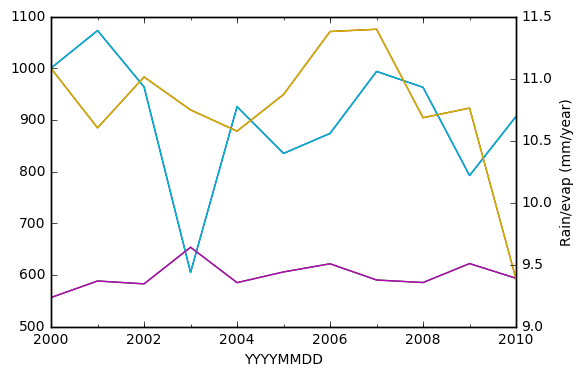

In [41]:
weather = pd.read_csv('rotterdam_weather_2000_2010.txt',skiprows=11,
                parse_dates=['YYYYMMDD'],index_col='YYYYMMDD',skipinitialspace=True)
weather.TG = 0.1 * weather.TG
weather.RH = 0.1 * weather.RH
weather.EV24 = 0.1 * weather.EV24
weather.RH[weather.RH<0] = 0
yearly_rain = weather.RH.resample('A', kind='period').sum()
yearly_evap = weather.EV24.resample('A', kind='period').sum()
yearly_temp = weather.TG.resample('A', kind='period').mean()
yearly_rain.plot()
yearly_evap.plot()
yearly_temp.plot(secondary_y=True)
plt.xlabel('Year')
plt.ylabel('Rain/evap (mm/year)')
plt.show()